<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/3.5-6%20K-Means%20and%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 3.5-6 K-Means and Support Vector Machine

**Key Concepts**:

- K-Means
    - Within-Cluster Sum of Squares (WCSS)
    - Maximum Likelihood Estimation and Gradient Descent
- Support Vector Machines
    - Hyperplane
    - Margin
    - Support Vectors
    - Loss Function
    - Gradient Descent
- Demo with Scikit-Learn (sklearn.svm.LinearSVC)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

## K-Means

K-Means is an unsupervised learning algorithm that is used to cluster data.

Within-Cluster Sum of Squares (WCSS)
$\text{WCSS}_i = \sum_{x \in S_i} {\left\| x_i - \mu_j \right\|^2}$

The algorithm is defined as:

1. Initialize $k$ centroids $\mu_1, \dots, \mu_k \in \mathbb{R}^d$
2. Repeat until convergence:
    1. Assign each sample $x_i$ to the closest centroid $\mu_j$:
        $j = \arg \min \sum_{i=1}^{k}{WCSS}$
    2. Update the centroids:
        $\mu(S) = \frac{1}{|S|} \sum_{x \in S} x$

where:
- $k$ is the number of clusters
- $n$ is the number of features
- $x_i$ is the $i$-th sample
- $\mu_j$ is the $j$-th centroid
- $S$ is the set of samples assigned to the $j$-th cluster

K-Means converges by $\sum_{i=1}^{k}{WCSS}$ monotonically decreasing in each iteration.


In [2]:
def k_means(X, k, n_iter):
    """
    K-Means clustering algorithm.

    :param X: array-like, shape (n_samples, n_features)
        Training data.
    :param k: int
        Number of clusters.
    :param n_iter: int
        Number of iterations.
    :return: array-like, shape (n_samples,)
    """

    n_samples, n_features = X.shape

    # Initialize centroids
    centroids = np.random.rand(k, n_features)

    # Initialize clusters
    clusters = np.zeros(n_samples)

    for _ in range(n_iter):
        # Use WCSS to assign each sample to the closest centroid
        clusters = np.argmin(cdist(X, centroids), axis=1)

        # Update centroids
        for i in range(k):
            centroids[i] = np.mean(X[clusters == i], axis=0)

    return clusters, centroids

### K-Means Demo

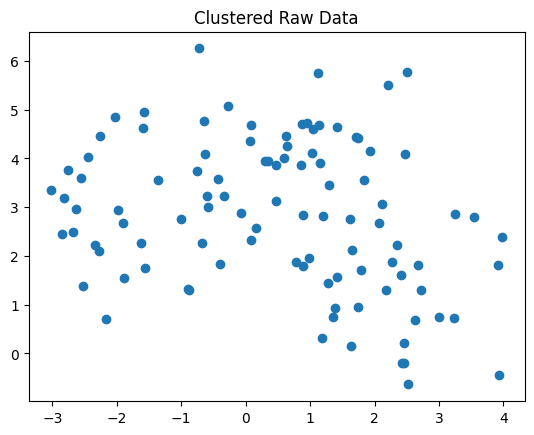

In [3]:
from sklearn.datasets import make_blobs

# Generate Data
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
""" Data Format
X = [
    [x1, y1],
    [x2, y2],
    ...
    [xn, yn]
]

y = [(0|1|2),...]
"""

plt.scatter(X[:, 0], X[:, 1])
plt.title("Clustered Raw Data")
plt.show()

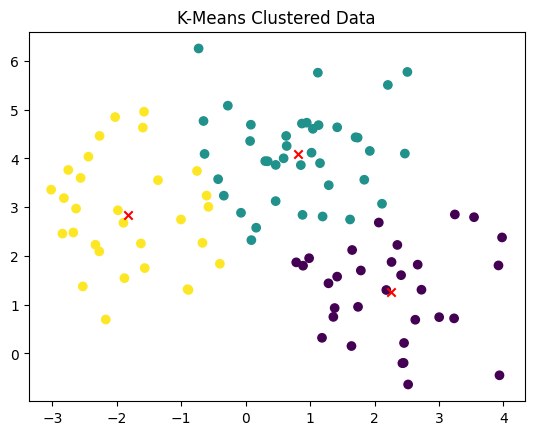

In [4]:
clusters, centroids = k_means(X, 3, 10)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='r')
plt.title("K-Means Clustered Data")
plt.show()

## Support Vector Machines

A Support Vector Machine (SVM) is a supervised learning model to analyze data for classification and regression analysis. SVMs are used for classification problems.
The goal of SVMs is to find a hyperplane that separates the data into classes.

### Hyperplane


A hyperplane is a subspace of one dimension less than the ambient space it is embedded in.
For example, a line in 2D space is a hyperplane in 3D space.
It is used to separate the data into classes.

This notebook will focus on linear SVMs, which are used to separate data using a linear hyperplane.

Hyperplane Equation: $w^T x + b = 0$

where:
- $w$ is the normal vector of the hyperplane
- $b$ is the bias of the hyperplane
- $x$ is the sample

### Margin

The margin is the distance between the hyperplane and the closest data points.

The margin is defined as: $M = \frac{2}{\left\| w \right\|}$

where:
- $\left\| w \right\|$ is the norm of the normal vector


### Support Vectors

Support vectors are the data points that are closest to the hyperplane.
The support vectors are defined as:

$S = \{x_i \in X | y_i (w^T x_i + b) = 1\}$

where:
- $X$ is the set of all samples
- $x_i$ is the $i$-th sample
- $y_i$ is the label of the $i$-th sample

### Loss Function

The loss function is used to measure the performance of the model.
The loss function is defined as:

$L(w, b) = {\lambda} \left\| w \right\|^2 + \frac{1}{n} \sum_{i=1}^{n}{\max(0, 1 - y_i (w^T x_i + b))}$

where:
- $\lambda$ is the regularization parameter


In [5]:
def loss(X, y, w, b, l):
    """
    Loss function for linear SVMs.

    :param X: array-like, shape (n_samples, n_features)
        Training data.
    :param y: array-like, shape (n_samples,)
        Target values.
    :param w: array-like, shape (n_features,)
        Normal vector of the hyperplane.
    :param b: float
        Bias of the hyperplane.
    :param l: float
        Regularization parameter.
    :return: float
    """

    n_samples = X.shape[0]

    return l * np.linalg.norm(w) ** 2 + np.sum(np.maximum(0, 1 - y * (np.dot(X, w) + b))) / n_samples

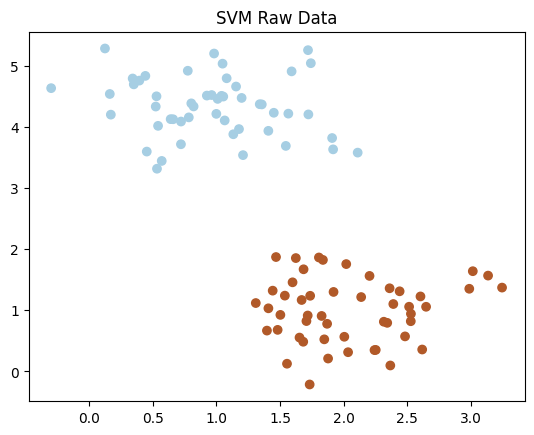

In [6]:
# Generate data
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=0.5)

# Plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("SVM Raw Data")
plt.show()

In [7]:
# Initialize weights, bias, and regularization parameter
w = np.array([1, 1])
b = 0
l = 1

print(f"Loss: {loss(X, y, w, b, l):0.4f}")

Loss: 2.5000


### Gradient Descent

Gradient descent is an optimization algorithm used to minimize the loss function.
The gradient descent algorithm is defined as:

$w \leftarrow w - \alpha \frac{\partial L}{\partial w}$,

$b \leftarrow b - \alpha \frac{\partial L}{\partial b}$

**Stochastic gradient descent method**:

$\text{New} b = b - \beta$

where:

$\beta = y_i$
if $1 - y_i (w^T x_i + b) > 0$
else $0$.

$\text{New} w = w - \beta x_i$

where:

$\beta = 2 \lambda w - \frac{y_i x_i}{n}$
if $1 - y_i (w^T x_i + b) > 0$
else $2 \lambda w$.

## Demo

In [8]:
from sklearn.svm import LinearSVC

In [9]:
clf = LinearSVC()
clf.fit(X, y)

print(clf.coef_, clf.intercept_)

[[ 0.90049741 -0.94808788]] [0.95549015]


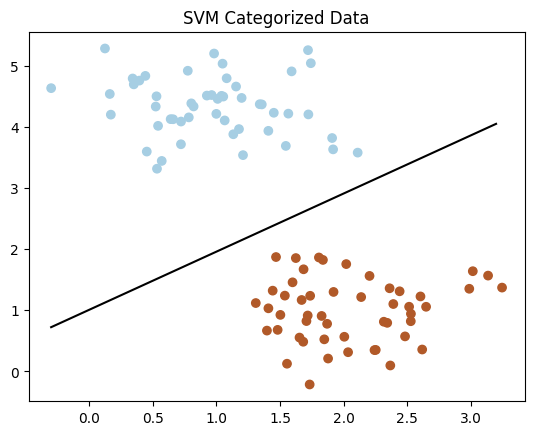

In [10]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot hyperplane
x = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
y = -(clf.coef_[0][0] * x + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(x, y, color='k')

plt.title("SVM Categorized Data")
plt.show()